<a href="https://colab.research.google.com/github/ss-shankar/intershipchallenge-shopify/blob/main/Data_Science_Intern_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('https://github.com/ss-shankar/intershipchallenge-shopify/blob/main/data/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set.xlsx?raw=true')

# Analysis

In [6]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [8]:
df.shape

(5000, 7)

**Observation:**


1.   There are no missing value in the dataset
2.   order_id : Nominal Variable
3.   shop_id : Nominal Variable
4.   user_id : Nominal Variable
5.   order_amount : Ratio Variable
6.   total_item :   Ratio Variable
7.   payment_method : Nominal Variable
8.   created_at : Interval Variable
  



In [9]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**Note:**


*   *order_amount* mean is very large compared to median and also max is very large compared to 75th percentile 
*   *total_items* mean is very large compared to median and also max is very large compared to 75th percentile
*   so both *order_amount* and *total_items* has **outliers** 



In [10]:
df['amount_per_item'] = df['order_amount'] / df['total_items']

In [11]:
nominal_variable = ['order_id', 'shop_id', 'user_id', 'payment_method']
interval_variable = ['created_at']
ratio_variable = ['order_amount', 'total_items', 'amount_per_item']

In [12]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


In [13]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,amount_per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


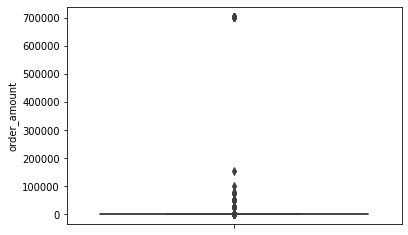

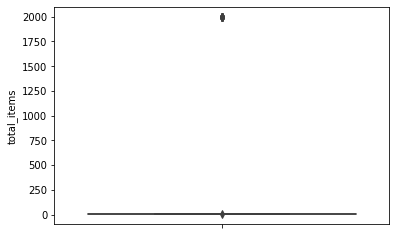

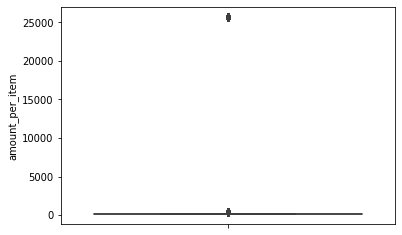

In [14]:
for i in ratio_variable :
  sns.boxplot(y=i, data=df)
  plt.show()

**Remove Outliers**

*   The quality of the dataset is affected by the outliers 
*   So we are removing outliers using IQR 
*   The normal data range with lower limit as Q1 - 1.5 * IQR and upper limit as Q3 + 1.5 * IQR 



In [15]:
for i in ratio_variable :
  q1 = df[i].quantile(0.05)
  q3 = df[i].quantile(0.95)
  iqr = q3 - q1
  df_new = df[(df[i] >= q1 - 1.5 * iqr) & (df[i] <= q3 + 1.5 * iqr )]

In [16]:
df_new.shape

(4903, 8)

In [17]:
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items,amount_per_item
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


**Note:**


*   Now There are no outliers in Dataset
*   **Average order value** now is **300.16**
*   **Average value per item** is **150.40**



In [18]:
df_shop = df_new.groupby('shop_id')['order_amount'].sum()

In [19]:
df_shop = df_shop.reset_index()

In [20]:
df_shop.head()

,shop_id,order_amount
0,1,13588
1,2,9588
2,3,14652
3,4,13184
4,5,13064


<BarContainer object of 98 artists>

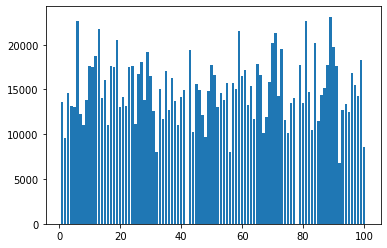

In [21]:
plt.bar(x= df_shop['shop_id'], height = df_shop['order_amount'])

In [22]:
df_shop.sort_values(by=['order_amount'], ascending=False, inplace=True)

In [23]:
df_shop.head()

,shop_id,order_amount
86,89,23128
78,81,22656
5,6,22627
12,13,21760
57,59,21538


In [24]:
df_shop.describe()

,shop_id,order_amount
count,98.000000,98.000000
mean,50.306122,15016.979592
std,29.162329,3469.426421
min,1.000000,6840.000000
25%,25.250000,12803.500000
50%,50.500000,14763.000000
75%,74.750000,17478.000000
max,100.000000,23128.000000


**Note:**

*   After cleaning the data there are **98 sneaker shops** with an **average revenue per shop** of **15016.98** over the 30 day window



In [25]:
df_user = df_new.groupby('user_id')['order_amount'].sum()

In [26]:
df_user = df_user.reset_index()

In [27]:
df_user.head()

,user_id,order_amount
0,700,4790
1,701,5162
2,702,5286
3,703,6091
4,704,3854


<BarContainer object of 300 artists>

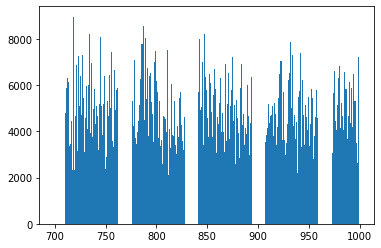

In [28]:
plt.bar(x=df_user['user_id'], height=df_user['order_amount'])

In [29]:
df_user.sort_values(by=['order_amount'], ascending=False, inplace=True)

In [30]:
df_user.head()

,user_id,order_amount
18,718,8952
87,787,8532
34,734,8200
147,847,8197
45,745,8079


In [31]:
df_user.describe()

,user_id,order_amount
count,300.000000,300.000000
mean,849.500000,4905.546667
std,86.746758,1360.171689
min,700.000000,2102.000000
25%,774.750000,3837.000000
50%,849.500000,4688.000000
75%,924.250000,5819.000000
max,999.000000,8952.000000


**Note:**


*   After cleaning the dataset there are **300 user_id** with an **average revenue per user_id** is **4905.55** 

